In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_buckets(N_buckets=10000, N_rain=1000, av_V = 1., sigma_V=-1.):
    buckets = np.zeros(N_buckets)
    
    for i in range(N_buckets):
        N_drops = np.random.poisson(N_rain)
        v = np.ones(N_drops)*av_V
        if sigma_V > 0:
            v*= np.random.normal(1.,sigma_V,N_drops)
        buckets[i] = np.sum(v)

    return buckets    

In [75]:
N_buckets = 5000
N_rain = 1000
av_V = 1000./N_rain
buckets = get_buckets(N_buckets=N_buckets, N_rain=N_rain, av_V=av_V, sigma_V=-.1)
buckets_small = get_buckets(N_buckets=N_buckets, N_rain=.5*N_rain, av_V=av_V*2,sigma_V=-.1)

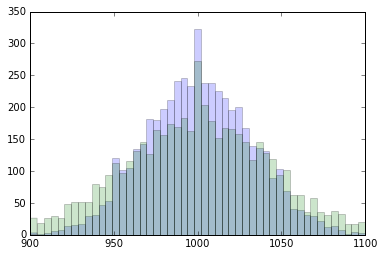

In [76]:
h = plt.hist(buckets, bins=np.linspace(900,1100, 50), alpha=0.2)
h = plt.hist(buckets_small, bins=np.linspace(900,1100,50), alpha=0.2)

In [77]:
sigmaVs=np.linspace(-.1,.5)
sigBucket = np.zeros(sigmaVs.size)
prediction = np.zeros(sigmaVs.size)
prediction_r = np.zeros(sigmaVs.size)
prediction_n = np.zeros(sigmaVs.size)

for i, sigma in enumerate(sigmaVs):
    sigBucket[i] = np.std(get_buckets(N_buckets=N_buckets, N_rain=N_rain, av_V=av_V, sigma_V=sigma))
    rel_variance = (av_V**2)*(1./N_rain) + (sigma/av_V)**2 /(N_rain)
    prediction[i]=N_rain*av_V*np.sqrt(rel_variance)

    rel_variance_n = (av_V**2)*(1./N_rain) 
    prediction_n[i]=N_rain*av_V*np.sqrt(rel_variance_n)

    rel_variance_r =  (sigma/av_V)**2/(N_rain)
    prediction_r[i]=N_rain*av_V*np.sqrt(rel_variance_r)

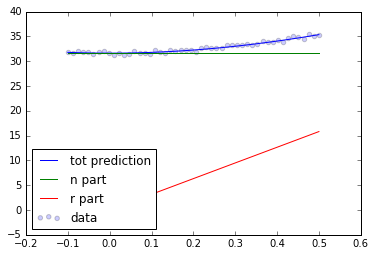

In [78]:
plt.scatter(sigmaVs, sigBucket, alpha=0.2,label='data')
plt.plot(sigmaVs, prediction, label='tot prediction')
plt.plot(sigmaVs, prediction_n, label='n part')
plt.plot(sigmaVs, prediction_r, label='r part')
plt.legend(loc='lower left')

## doesn't work with different N_rain